# Overview

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.

Following is the Data Dictionary for Credit Card dataset :-

<b>CUSTID</b>: Identification of Credit Card holder (Categorical)

<b>BALANCE</b> : Balance amount left in their account to make purchases

<b>BALANCEFREQUENCY</b> : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

<b>PURCHASES</b> : Amount of purchases made from account

<b>ONEOFFPURCHASES</b> : Maximum purchase amount done in one-go

<b>INSTALLMENTSPURCHASES</b> : Amount of purchase done in installment

<b>CASHADVANCE</b> : Cash in advance given by the user

<b>PURCHASESFREQUENCY</b> : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

<b>ONEOFFPURCHASESFREQUENCY</b> : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

<b>CASHADVANCEFREQUENCY</b> : How frequently the cash in advance being paid

<b>CASHADVANCETRX</b> : Number of Transactions made with "Cash in Advanced"

<b>PURCHASESTRX</b> : Numbe of purchase transactions made

<b>CREDITLIMIT</b> : Limit of Credit Card for user

<b>PAYMENTS</b> : Amount of Payment done by user

<b>MINIMUM_PAYMENTS</b> : Minimum amount of payments made by user

<b>PRCFULLPAYMENT</b> : Percent of full payment paid by user

<b>TENURE</b> : Tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

# Loading Dataset

In [2]:
creditcard_df=pd.read_csv("CC GENERAL.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Explorartory Data Analysis(EDA)

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.drop("CUST_ID",axis=1,inplace=True)

In [5]:
# information about the data
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
creditcard_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# find all columns having missing values
missing_var=[var for var in creditcard_df.columns if creditcard_df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [8]:
creditcard_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


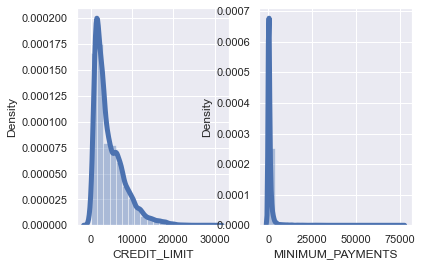

In [9]:
# see normal distribution of columns having null value
sns.set()
for i,var in enumerate(missing_var):
  plt.subplot(1,2,i+1)
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':5})

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

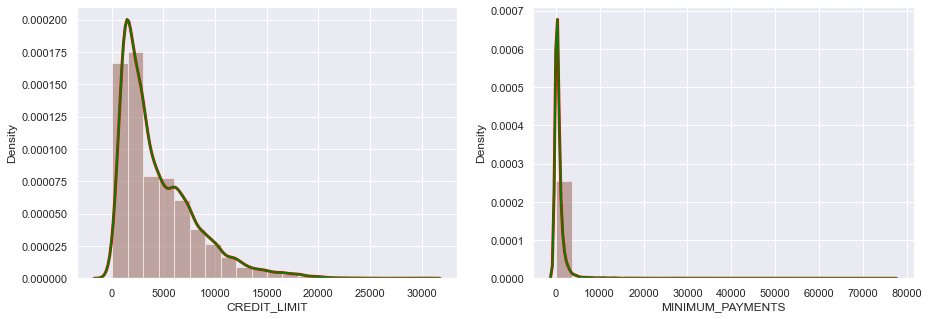

In [10]:
# check the normal distribution of columns having null values by filling with the mean value
plt.figure(figsize=(15,5))
sns.set()
for i,var in enumerate(missing_var):
  plt.subplot(1,2,i+1)
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':3,'color':'red'},label="original")
  sns.distplot(creditcard_df[var],bins=20,kde_kws={'linewidth':2,'color':'green'},label="mean")

# Data Preprocessing

In [11]:
# fill mean value in place of missing values
creditcard_df["MINIMUM_PAYMENTS"]=creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())
creditcard_df["CREDIT_LIMIT"]=creditcard_df["CREDIT_LIMIT"].fillna(creditcard_df["CREDIT_LIMIT"].mean())

In [12]:
# Again check for null values
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# check duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [14]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# Outlier Detection

In [15]:
# find outlier in all columns
for i in creditcard_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=creditcard_df[i].quantile(0.95)
  min_thresold=creditcard_df[i].quantile(0.05)
  creditcard_df_no_outlier=creditcard_df[(creditcard_df[i] < max_thresold) & (creditcard_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [16]:
# remove outliers from columns having nearly 10% outlier
max_thresold_BALANCE=creditcard_df["BALANCE"].quantile(0.95)
min_thresold_BALANCE=creditcard_df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT=creditcard_df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT=creditcard_df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS=creditcard_df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS=creditcard_df["PAYMENTS"].quantile(0.05)
creditcard_df_no_outlier=creditcard_df[(creditcard_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (creditcard_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (creditcard_df["BALANCE"] < max_thresold_BALANCE) & (creditcard_df["BALANCE"] > min_thresold_BALANCE) &  (creditcard_df["PAYMENTS"] < max_thresold_PAYMENTS) & (creditcard_df["PAYMENTS"] > min_thresold_PAYMENTS)]

In [17]:
# DataFrame having no outlier
creditcard_df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


<AxesSubplot:>

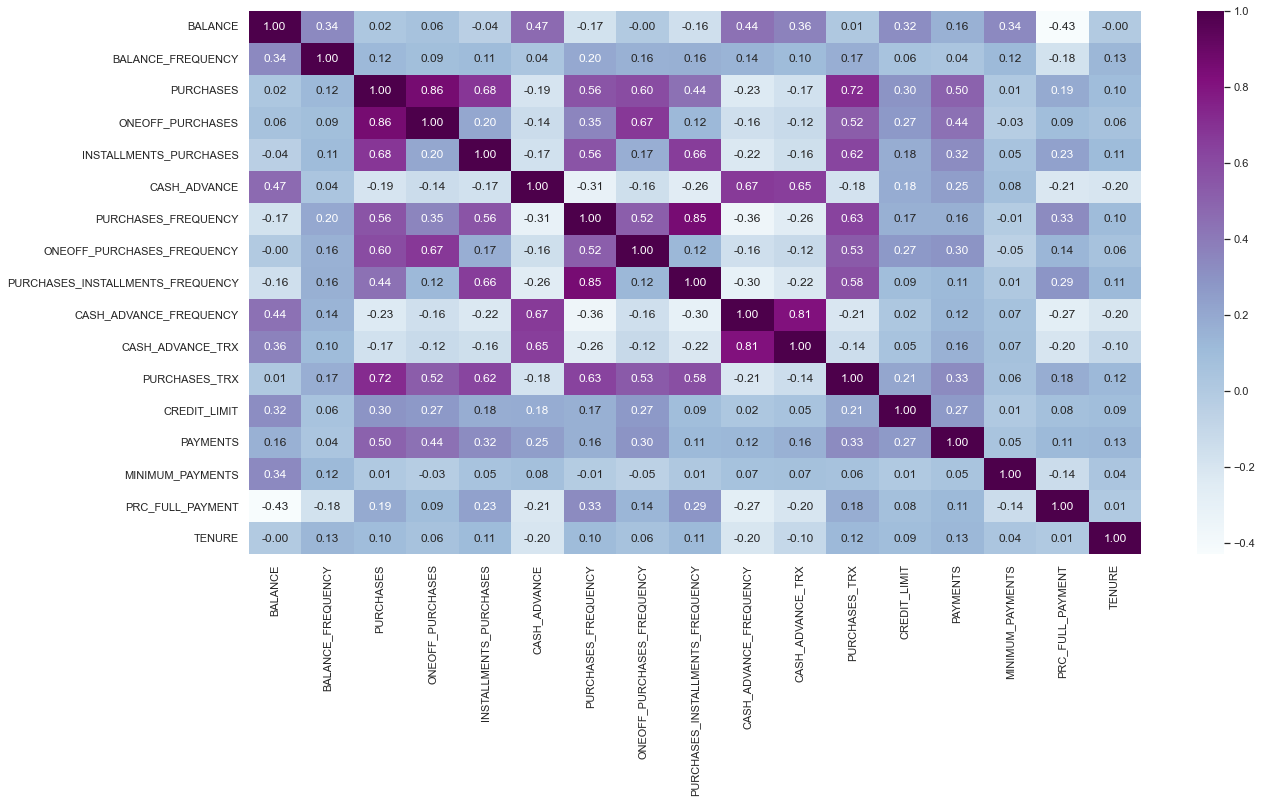

In [18]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=creditcard_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')

In [19]:
# scale the DataFrame
scalar=StandardScaler()
creditcard_scaled_df=scalar.fit_transform(creditcard_df_no_outlier.iloc[:,1:])

In [20]:
# convert the DataFrame into 2D DataFrame for visualization
pca= PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_scaled_df)
pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-2.080747,2.910233
1,1.220779,-0.100313
2,-1.541943,-1.421382
3,0.754770,-0.966351
4,0.640510,-1.521072


# Finding K Through Elbow Method

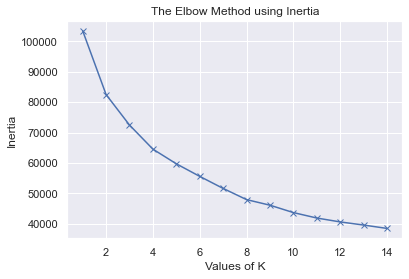

In [21]:
inertia=[]
range_val=range(1,15)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

# Different Clustering Techniques

In [22]:
# Spectral clustering
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

# Agglomerative clustering
def train_Agglomerative(linkage,k,X):
  agglo_model = AgglomerativeClustering(linkage=linkage,n_clusters=k)
  y_pred = agglo_model.fit_predict(X)
  print("Agglomerative Clustering : clusters : ",k," linkage : ",linkage," silhouette_score : ",silhouette_score(X,y_pred) )

# GaussianMixture Model based clustering
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

In [23]:
# Spectral clustering
clusters=[3,4,5,6]
for i in clusters:
  train_spectral(i,creditcard_scaled_df)

Spectral Clustering : clusters :  3  silhouette_score :  0.751809376544207
Spectral Clustering : clusters :  4  silhouette_score :  0.6296027199569876
Spectral Clustering : clusters :  5  silhouette_score :  0.6279169504650179
Spectral Clustering : clusters :  6  silhouette_score :  0.5879602032133308


In [24]:
# Agglomerative clustering
clusters=[3,4,5,6]
linkage=['ward', 'complete', 'average', 'single']
for lin in linkage:
  for i in clusters:
    train_Agglomerative(lin,i,creditcard_scaled_df)

Agglomerative Clustering : clusters :  3  linkage :  ward  silhouette_score :  0.15417291206918196
Agglomerative Clustering : clusters :  4  linkage :  ward  silhouette_score :  0.15804928228576565
Agglomerative Clustering : clusters :  5  linkage :  ward  silhouette_score :  0.15874639048518357
Agglomerative Clustering : clusters :  6  linkage :  ward  silhouette_score :  0.17328166288981922
Agglomerative Clustering : clusters :  3  linkage :  complete  silhouette_score :  0.6336301266599804
Agglomerative Clustering : clusters :  4  linkage :  complete  silhouette_score :  0.23243860000639316
Agglomerative Clustering : clusters :  5  linkage :  complete  silhouette_score :  0.22469625122741693
Agglomerative Clustering : clusters :  6  linkage :  complete  silhouette_score :  0.2243784337793718
Agglomerative Clustering : clusters :  3  linkage :  average  silhouette_score :  0.751809376544207
Agglomerative Clustering : clusters :  4  linkage :  average  silhouette_score :  0.6279226019

In [25]:
# GaussianMixture Model based clustering
clusters=[3,4,5,6]
for i in clusters:
  train_GaussianMixture(i,creditcard_scaled_df)

GaussianMixture Model based Clustering : clusters :  3  silhouette_score :  0.12301718705494862
GaussianMixture Model based Clustering : clusters :  4  silhouette_score :  0.10280452424346903
GaussianMixture Model based Clustering : clusters :  5  silhouette_score :  0.0960364302669387
GaussianMixture Model based Clustering : clusters :  6  silhouette_score :  0.0766855504301578


# Building Model

## K-Means Clustering

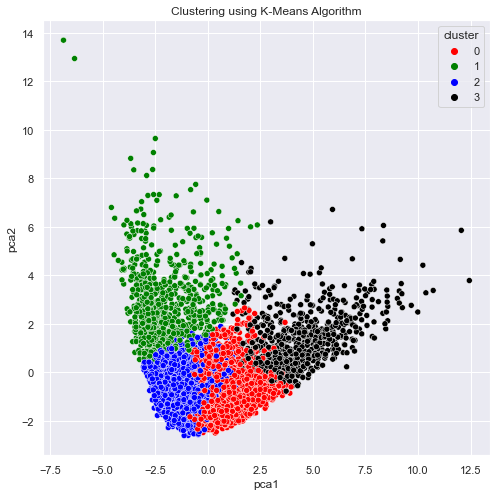

In [26]:
# apply kmeans algorithm
kmeans_model=KMeans(4)
kmeans_model.fit_predict(creditcard_scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
# visualize the clustered dataframe
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

## Agglomerative Clustering

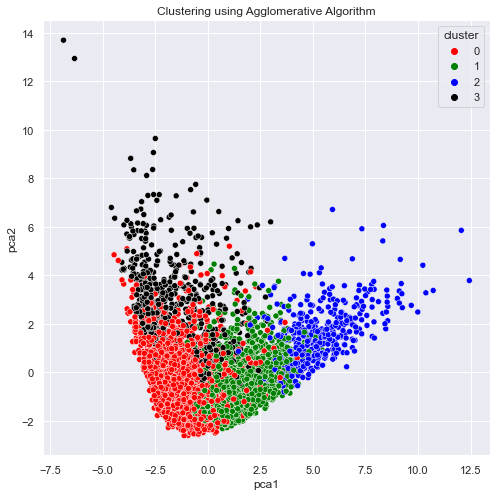

In [27]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
y_pred = agglo_model.fit_predict(creditcard_scaled_df)
pca_df_aglo= pd.concat([pca_df,pd.DataFrame({'cluster':agglo_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_aglo,palette=['red','green','blue','black'])
plt.title("Clustering using Agglomerative Algorithm")
plt.show()

## Spectral Clustering

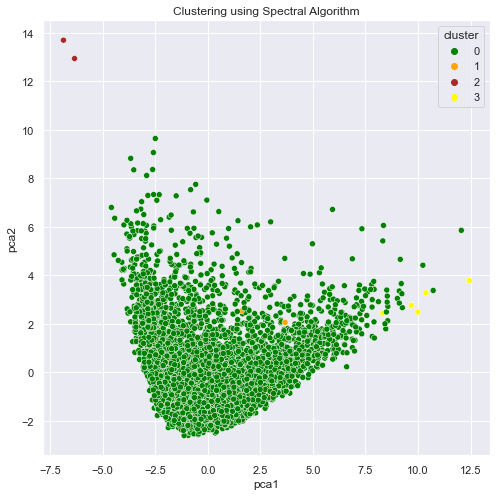

In [30]:
spectral_model = SpectralClustering(n_clusters=4)
y_pred = spectral_model.fit_predict(creditcard_scaled_df)
pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl,palette=['green','orange','brown',"yellow"])
plt.title("Clustering using Spectral Algorithm")
plt.show()

## GaussianMixture Model based clustering

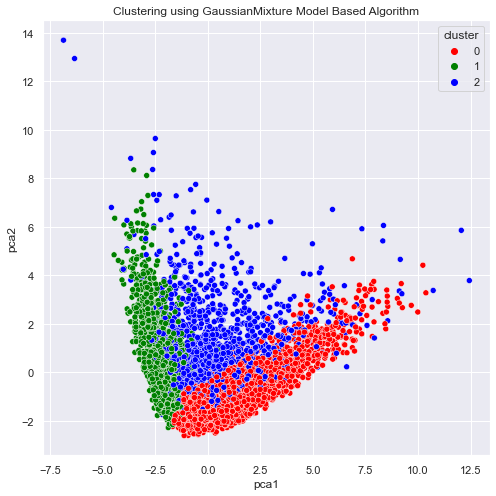

In [31]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(creditcard_scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
plt.title("Clustering using GaussianMixture Model Based Algorithm")
plt.show()

## DBSCAN Clustering

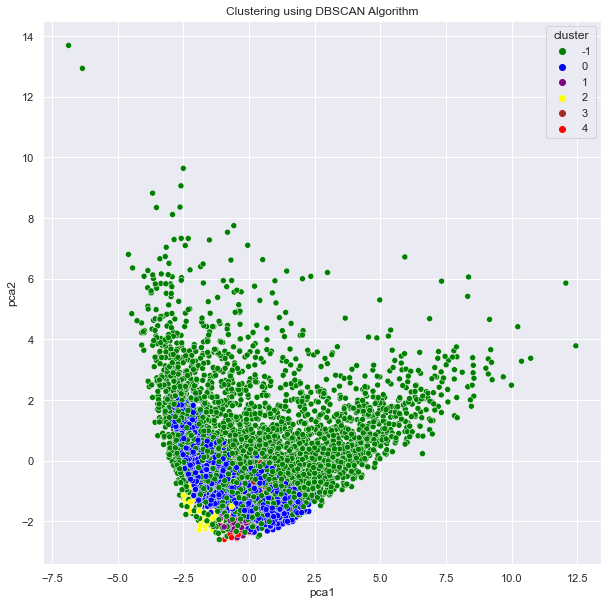

In [32]:
model_dbscan = DBSCAN(eps=1, min_samples=18)
y_pred = model_dbscan.fit_predict(creditcard_scaled_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan,palette=['green','blue','purple',"yellow","brown","red"])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

# Conclusion

#### Here we saw that all the datapoints are clstered nicely with very less errors by using k-means clustering as compared to other clustering algorithms. So we'll use K-Means model for clustering in this dataset.